In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D,Dense,Flatten,Dropout
import matplotlib.pyplot as plt 


In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
data_gen = ImageDataGenerator(rescale = 1/255,
                               shear_range = 0.2,
                               zoom_range = 0.2,
                               horizontal_flip = True,
                             validation_split=0.2)

In [15]:
# here we will assign the train test split for data sets 

training_path=r"C:\Users\dell\Desktop\gahlyan\neural networks\Fire-Detection"
training_set = data_gen.flow_from_directory(training_path,
                                             target_size = (64,64),
                                             batch_size = 32,
                                             class_mode = "binary",
                                           subset='training')
test_set = data_gen.flow_from_directory(training_path,
                                             target_size = (64,64),
                                             batch_size = 32,
                                              classes=['no fire','fire'],
                                             class_mode = "binary",
                                           subset='validation')
                                   


Found 521 images belonging to 2 classes.
Found 130 images belonging to 2 classes.


In [17]:
data_image=next(training_set)

0.0

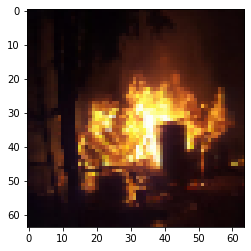

In [18]:
import matplotlib.pyplot as plt
imag_num=13
plt.imshow(data_image[0][imag_num])
data_image[1][imag_num]

In [127]:
model=Sequential()
#convolution layer 1
model.add(Conv2D(36,(3,3),activation='relu',input_shape=(64,64,3)))
model.add(MaxPool2D())
#convolution layer 2
model.add(Conv2D(72,(3,3),activation='relu'))
model.add(MaxPool2D())
#convolution layer 3
model.add(Conv2D(72,(3,3),activation='relu'))
model.add(MaxPool2D())


model.add(Flatten())

In [128]:
model.add(Dense(128,activation='relu'))   # hidden layer 1
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))  # hidden layer 2
# model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))    # hidden layer 3
model.add(Dropout(0.1)) 
model.add(Dense(1,activation='sigmoid'))  # output layer 


In [129]:
model.compile('adam', loss='binary_crossentropy',metrics=['accuracy'])
model.fit(training_set,epochs= 50  )

Epoch 1/50
17/17 [==============================] - 12s 573ms/step - loss: 0.4445 - accuracy: 0.8004
Epoch 2/50
17/17 [==============================] - 11s 652ms/step - loss: 0.3384 - accuracy: 0.8330
Epoch 3/50
17/17 [==============================] - 11s 618ms/step - loss: 0.3186 - accuracy: 0.8599
Epoch 4/50
17/17 [==============================] - 10s 564ms/step - loss: 0.3144 - accuracy: 0.8676
Epoch 5/50
17/17 [==============================] - 11s 611ms/step - loss: 0.2866 - accuracy: 0.8464
Epoch 6/50
17/17 [==============================] - 11s 643ms/step - loss: 0.2805 - accuracy: 0.8714
Epoch 7/50
17/17 [==============================] - 10s 549ms/step - loss: 0.2651 - accuracy: 0.8752
Epoch 8/50
17/17 [==============================] - 10s 599ms/step - loss: 0.2858 - accuracy: 0.8676
Epoch 9/50
17/17 [==============================] - 10s 603ms/step - loss: 0.2584 - accuracy: 0.8906
Epoch 10/50
17/17 [==============================] - 12s 701ms/step - loss: 0.2825 - accura

In [130]:
model.fit(test_set,epochs=50)

Epoch 1/50
5/5 [==============================] - 3s 622ms/step - loss: 3.6209 - accuracy: 0.3154
Epoch 2/50
5/5 [==============================] - 2s 417ms/step - loss: 0.6365 - accuracy: 0.7769
Epoch 3/50
5/5 [==============================] - 2s 380ms/step - loss: 0.5622 - accuracy: 0.8308
Epoch 4/50
5/5 [==============================] - 2s 395ms/step - loss: 0.5026 - accuracy: 0.8308
Epoch 5/50
5/5 [==============================] - 2s 366ms/step - loss: 0.5172 - accuracy: 0.8308
Epoch 6/50
5/5 [==============================] - 2s 427ms/step - loss: 0.4998 - accuracy: 0.8308
Epoch 7/50
5/5 [==============================] - 2s 429ms/step - loss: 0.4709 - accuracy: 0.8308
Epoch 8/50
5/5 [==============================] - 2s 378ms/step - loss: 0.4651 - accuracy: 0.8308
Epoch 9/50
5/5 [==============================] - 2s 414ms/step - loss: 0.4608 - accuracy: 0.8308
Epoch 10/50
5/5 [==============================] - 2s 318ms/step - loss: 0.4428 - accuracy: 0.8308
Epoch 11/50
5/5 [==

In [131]:
# saving the model


model.save(r"C:\Users\dell\Desktop\gahlyan\neural networks\firedetect.h5")

In [1]:
# load the model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

model_pd =load_model(r"C:\Users\dell\Desktop\gahlyan\neural networks\firedetect.h5")

1/1 [==============================] - 0s 203ms/step
1.7149718e-05
******   no fire  ********** 


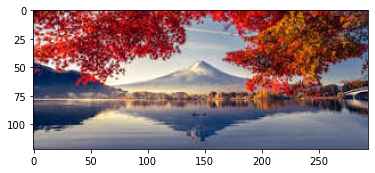

In [35]:
#loading the image from the path
testing_data = r"C:\Users\dell\Desktop\gahlyan\neural networks\firetestimage\imag6.jpg"
# displaying the image 
import matplotlib.pyplot as plt
test_image=plt.imread(testing_data)
plt.imshow(test_image)

# predicting the class of image 
test_image = image.load_img(testing_data, target_size=(64,64))
test_image = image.img_to_array(test_image)/255   # i divide it by 255 just to normalize the image as our model is trained on normalised image 

test_image = np.expand_dims(test_image , axis=0)
result = model_pd.predict(test_image)
print(result[0][0])
if result[0][0]<0.5:
  print('******   no fire  ********** ')
else:
  print('******   fire  ********** ')


In [22]:
from sklearn.metrics import roc_curve , roc_auc_score
y_pred=model_pd.predict(data_image[0]).reshape(32,1)
roc_auc_score(data_image[1],y_pred)


1/1 [==============================] - 0s 91ms/step


0.109375